# Exploratory Data Analysis
*** 

#### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import re

import matplotlib.pyplot as plt
%matplotlib inline

### Read in the Data

In [7]:
# Read in the data
df = pd.read_pickle('../data/sentence.pkl')

In [8]:
# View the data
df.head()

,text,speaker_start,speaker_end,speaker_length,speaker,sentence,word_confidence,avg_confidence,min_conf,feed,...,feed_name,department,INTPTLON,INTPTLAT,ID_PLACES,text_clean,contains_fire,contains_evac,start_time,end_time
0,"sixty five area behind a wall . Or , you know ...",211.565,214.715,3.15,spk_2,9,"[0.6995, 0.7236, 0.9781, 1.0, 0.4078, 0.407, n...",0.836407,0.1454,201811080841-581016-26936_,...,Oroville_Police_Fire,BOTH,[],[],[],sixty five area behind a wall or you know i m ...,0,0,2018-11-08 06:44:31-08:00,2018-11-08 06:44:34-08:00
1,top of the old feather over our way for a girl...,255.925,257.655,1.73,spk_1,12,"[0.2531, 0.2075, 0.4166, 0.4302, 0.3133, 0.952...",0.606465,0.2075,201811080841-581016-26936_,...,Oroville_Police_Fire,BOTH,[],[],[],top of the old feather over our way for a girl...,0,0,2018-11-08 06:45:15-08:00,2018-11-08 06:45:17-08:00
2,Justin Maguire is clear and counting down from...,1095.9,1097.17,1.27,spk_5,34,"[0.5408, 0.8856, 0.9149, 1.0, 0.6942, 0.8126, ...",0.806101,0.1303,201811080841-581016-26936_,...,Oroville_Police_Fire,BOTH,"[-121.6064, -118.602213]","[39.7541919, 37.4828526]","[PARADISE, PARADISE]",justin maguire is clear and counting down from...,0,0,2018-11-08 06:59:15-08:00,2018-11-08 06:59:17-08:00
3,e,99.34,99.68,0.34,spk_4,2,[0.5987],0.598700,0.5987,201811080858-659667-24574_,...,Oroville_Fire,FIRE,[],[],[],e,0,0,2018-11-08 06:59:39-08:00,2018-11-08 06:59:39-08:00
4,seventy,99.68,100.14,0.46,spk_1,3,[0.9993],0.999300,0.9993,201811080858-659667-24574_,...,Oroville_Fire,FIRE,[],[],[],seventy,0,0,2018-11-08 06:59:39-08:00,2018-11-08 06:59:40-08:00


In [9]:
# Shape of the data
df.shape

(464, 22)

In [10]:
# Check for nulls
df.isnull().sum()

text               0
speaker_start      0
speaker_end        0
speaker_length     0
speaker            0
sentence           0
word_confidence    0
avg_confidence     0
min_conf           0
feed               0
location           0
state              0
feed_name          0
department         0
INTPTLON           0
INTPTLAT           0
ID_PLACES          0
text_clean         0
contains_fire      0
contains_evac      0
start_time         0
end_time           0
dtype: int64

NOTE: there are no 'NaNs' in this dataframe, but there are empty lists (location - meaning no location mentioned) 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 22 columns):
text               464 non-null object
speaker_start      464 non-null object
speaker_end        464 non-null object
speaker_length     464 non-null object
speaker            464 non-null object
sentence           464 non-null object
word_confidence    464 non-null object
avg_confidence     464 non-null float64
min_conf           464 non-null object
feed               464 non-null object
location           464 non-null object
state              464 non-null object
feed_name          464 non-null object
department         464 non-null object
INTPTLON           464 non-null object
INTPTLAT           464 non-null object
ID_PLACES          464 non-null object
text_clean         464 non-null object
contains_fire      464 non-null int64
contains_evac      464 non-null int64
start_time         464 non-null datetime64[ns, US/Pacific]
end_time           464 non-null datetime64[ns, US/Pacific

Observation: there are a few columns that are being read in as objects that should be floats (speaker_start, speaker_end, speaker_length, and min_conf)

In [12]:
# Change columns from object type to float
for column in ['speaker_start', 'speaker_end', 'speaker_length', 'min_conf']:
    df[column] = df[column].astype(float)

### EDA: Translation Confidence

In [13]:
# Look at translation confidence by feed name
df[['feed_name', 'avg_confidence', 'min_conf']].groupby('feed_name').mean()

,avg_confidence,min_conf
feed_name,,
Butte_Sheriff_Fire__Paradise_Police,0.757112,0.367348
Chico_Paradise_Fire__CalFire,0.763759,0.492304
Chico_Police_Dispatch,0.789480,0.409989
Oroville_Fire,0.652910,0.383007
Oroville_Police_Fire,0.784444,0.441091


In [14]:
df['avg_confidence'].mean()

0.7572163817968947

In [15]:
df['min_conf'].mean()

0.427073275862069

Observations:
- The translation is about 75% confidence on average
- The average for min confidence for a word is 42%

In [16]:
# Look at observations with low min_conf (what words are causing this?)
df[df['min_conf'] < 0.1][['text', 'min_conf', 'word_confidence']]

,text,min_conf,word_confidence
13,"left thirty eleven , the one you're with and t...",0.0801,"[0.1988, 0.9256, 0.4806, nan, 0.2506, 0.9984, ..."
15,"off your left . Keep twenty one eighty six , t...",0.0837,"[0.5102, 0.2649, 0.7269, nan, 0.6277, 1.0, 0.8..."
42,OROVILLE . What ? Stand by for now . Point one...,0.0841,"[0.4809, nan, 0.9374, nan, 0.4136, 0.4043, 0.9..."
43,transmitting any other year . Forty one eighte...,0.0807,"[0.7153, 1.0, 0.9521, 0.5355, nan, 0.8821, 0.9..."
44,attended one reportedly FIRE last founding and...,0.0684,"[0.2433, 0.522, 0.4216, 0.667, 0.5281, 0.3225,..."
59,Many things for me . You guys were out for the...,0.0793,"[0.9199, 0.6797, 0.6213, 0.7162, nan, 0.1517, ..."
63,with two n's Alexander thirty nineteen ninety ...,0.0522,"[1.0, 0.1961, 0.0522, 0.4547, 0.7934, 0.9836, ..."
69,twenty six . He weighed notification and they ...,0.0908,"[1.0, 0.5197, nan, 0.1279, 0.292, 0.6686, 0.84..."
78,SOUNDSLIKE . Can't you see he's just a warning...,0.0442,"[0.6575, nan, 0.7817, 0.4016, 0.8463, 0.8087, ..."
253,OROVILLE CONCOW The giant PHRASE twenty one . ...,0.0975,"[0.9841, 0.9259, 0.4452, 0.5588, 0.5944, 1.0, ..."


In [17]:
# Print list of words with low confidence 
for i in df[df['min_conf'] < 0.1][['text', 'min_conf', 'word_confidence']].index:
    string_list = df['text'][i].split()
    conf_list = df['word_confidence'][i]
    for word, conf in zip(string_list, conf_list):
        if conf < 0.1:
            print(f'Word: {word}, Confidence Level: {conf}')

Word: been, Confidence Level: 0.0801
Word: someone, Confidence Level: 0.0837
Word: the, Confidence Level: 0.0841
Word: the, Confidence Level: 0.0807
Word: your, Confidence Level: 0.0684
Word: were, Confidence Level: 0.0793
Word: n's, Confidence Level: 0.0522
Word: you, Confidence Level: 0.0908
Word: in, Confidence Level: 0.096
Word: sure, Confidence Level: 0.0442
Word: He, Confidence Level: 0.0975
Word: you, Confidence Level: 0.0791
Word: What's, Confidence Level: 0.0928
Word: wants, Confidence Level: 0.0808


Observation: these are all fairly normal words suprisingly

### EDA: Speaker 

In [18]:
# Average speaker length by feed_name
df[['feed_name', 'speaker_length']].groupby('feed_name').mean()

,speaker_length
feed_name,
Butte_Sheriff_Fire__Paradise_Police,1.611716
Chico_Paradise_Fire__CalFire,1.093750
Chico_Police_Dispatch,1.580679
Oroville_Fire,1.350444
Oroville_Police_Fire,1.326970


In [19]:
# Average speaker length for all observations
df['speaker_length'].mean()

1.3729676724137974

Observations: 
- Average speaker length is between 1.09 and 1.6 seconds for all feeds (1.3 for all)
    - It seems like the speakers do not talk for long and there is a lot of back and forth conversation (not surprisingly)

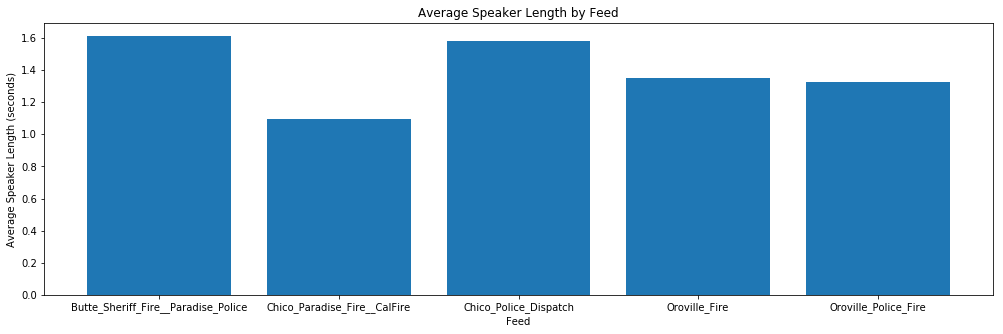

In [20]:
# Plot average speaker length by feed
plt.figure(figsize = (17, 5))
plt.bar(df.groupby('feed_name').mean()[['speaker_length']].index, 
        df.groupby('feed_name').mean()[['speaker_length']]['speaker_length'])
plt.title('Average Speaker Length by Feed')
plt.xlabel('Feed')
plt.ylabel('Average Speaker Length (seconds)');

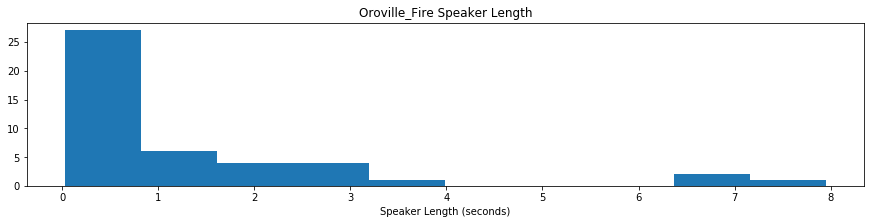

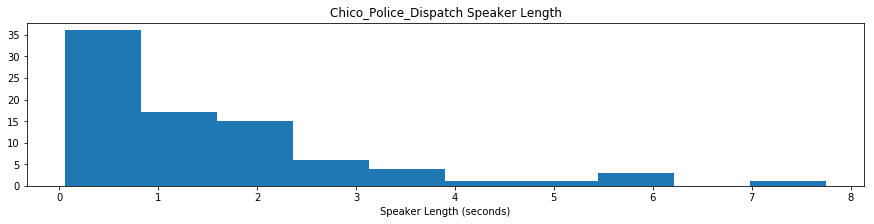

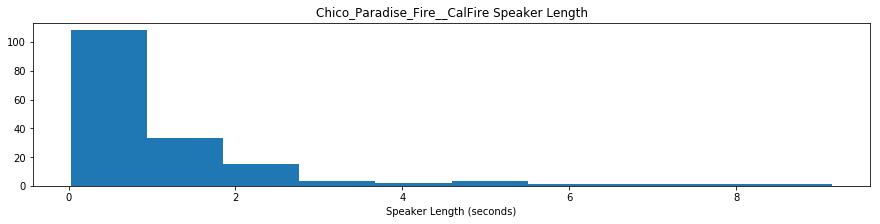

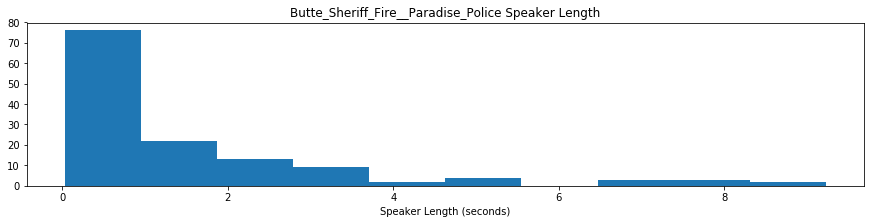

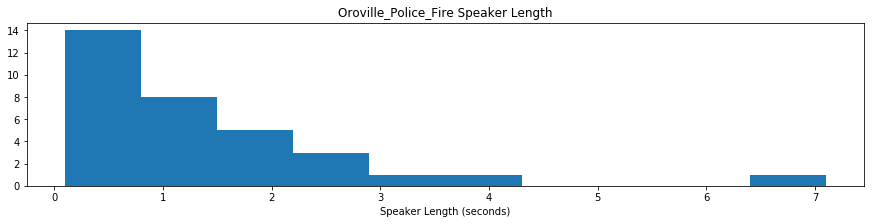

In [21]:
# Histogram for speaker length by department
for feed in set(df['feed_name']):
    plt.figure(figsize = (15, 3))
    plt.hist(df[df['feed_name'] == feed]['speaker_length'])
    plt.title(f'{feed} Speaker Length');
    plt.xlabel('Speaker Length (seconds)')

Observations:
- Majority of speaker length falls in the 3 and under buckets
- Each feed has an obersvation in the 7 and 8 buckets

In [22]:
# Look at text where speaker lenght is greater than 7.5
df[df['speaker_length'] > 7.5][['text', 'feed_name', 'start_time']]

,text,feed_name,start_time
42,OROVILLE . What ? Stand by for now . Point one...,Chico_Paradise_Fire__CalFire,2018-11-08 07:16:04-08:00
43,transmitting any other year . Forty one eighte...,Butte_Sheriff_Fire__Paradise_Police,2018-11-08 07:16:09-08:00
47,sixty four instead of three companies that buy...,Chico_Police_Dispatch,2018-11-08 07:16:41-08:00
73,Investigations on raw code three from the office,Butte_Sheriff_Fire__Paradise_Police,2018-11-08 07:26:01-08:00
80,And,Chico_Paradise_Fire__CalFire,2018-11-08 07:28:22-08:00
229,Wait it out . Have a little everything . Get d...,Butte_Sheriff_Fire__Paradise_Police,2018-11-08 08:02:26-08:00
317,Not a thing . Three . Where you guys heading ?...,Oroville_Fire,2018-11-08 08:27:49-08:00
388,Hello . What are clear ? What's going on ? Clo...,Butte_Sheriff_Fire__Paradise_Police,2018-11-08 08:44:58-08:00
460,What are you ? Wait now that CONCOW way Contac...,Butte_Sheriff_Fire__Paradise_Police,2018-11-08 09:10:45-08:00


Observation: 
- There is an observation from all the feeds
- The first three came from different feeds but all happened around the same time (7:16)

In [23]:
# Look at three observations where speaker length > 7.5 at 7:16
for text in df[df['speaker_length'] > 7.5][['text', 'feed_name', 'start_time']][0:3]['text']:
    print(text, '\n')

OROVILLE . What ? Stand by for now . Point one sixty one , forty one , seventy six . Start a second . Forgot . It's already kind of cross in that area headed sort of CONCOW area . All of the resources pays state until we get a report back from Mum , that is twenty one . Can I see a coffee ? And this really is just medical resource quarter . We have to strike teams of ENGINE one from humbles one from last load off at the time . And what's getting news ? Not not . They're attacking . Can I see it The least . We can get something out of thirty zero . One hundred . There's also a type one helicopter Out of the way . God be with you . Overwater Under forty years , funding copy . FIRE lines down . State  

transmitting any other year . Forty one eighteen for now . Toilet fifty one twenty one seventy six B . FIRE Full authority in that area headed towards CONCOW area . All of the resources needed to wait until we get a report back from Month twenty . One way of the one from couples . Want som

Observation: due to audio quality it is difficult to tell what they are talking about but there is a common mention of 'Concow' and 'fire'

In [24]:
# Speaker gantt chart - MATT

### EDA: Location

In [25]:
# New column for number of locations mentioned per observation
df['num_locations'] = df['location'].map(len)

In [26]:
# How many rows have a location?
print('Number of Rows with a Location Mentioned: ', len(df[df['num_locations'] != 0]))
print(f"{round( (len(df[df['num_locations'] != 0]) / len(df) ) * 100, 2)}% of observations mention a location")
print('Average Number of Locations (if one): ', df[df['num_locations'] != 0]['num_locations'].mean())      

Number of Rows with a Location Mentioned:  138
29.74% of observations mention a location
Average Number of Locations (if one):  1.5434782608695652


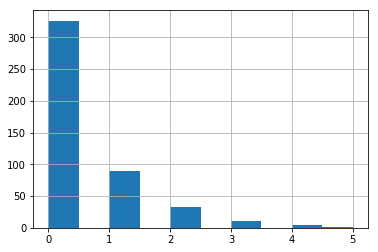

In [27]:
# Distribution of number of locations mentioned
df['num_locations'].hist();

In [28]:
# Grab the first location mentioned in an observation
df['location_1'] = df['location'].map(lambda x: x[0] if len(x) != 0 else None)

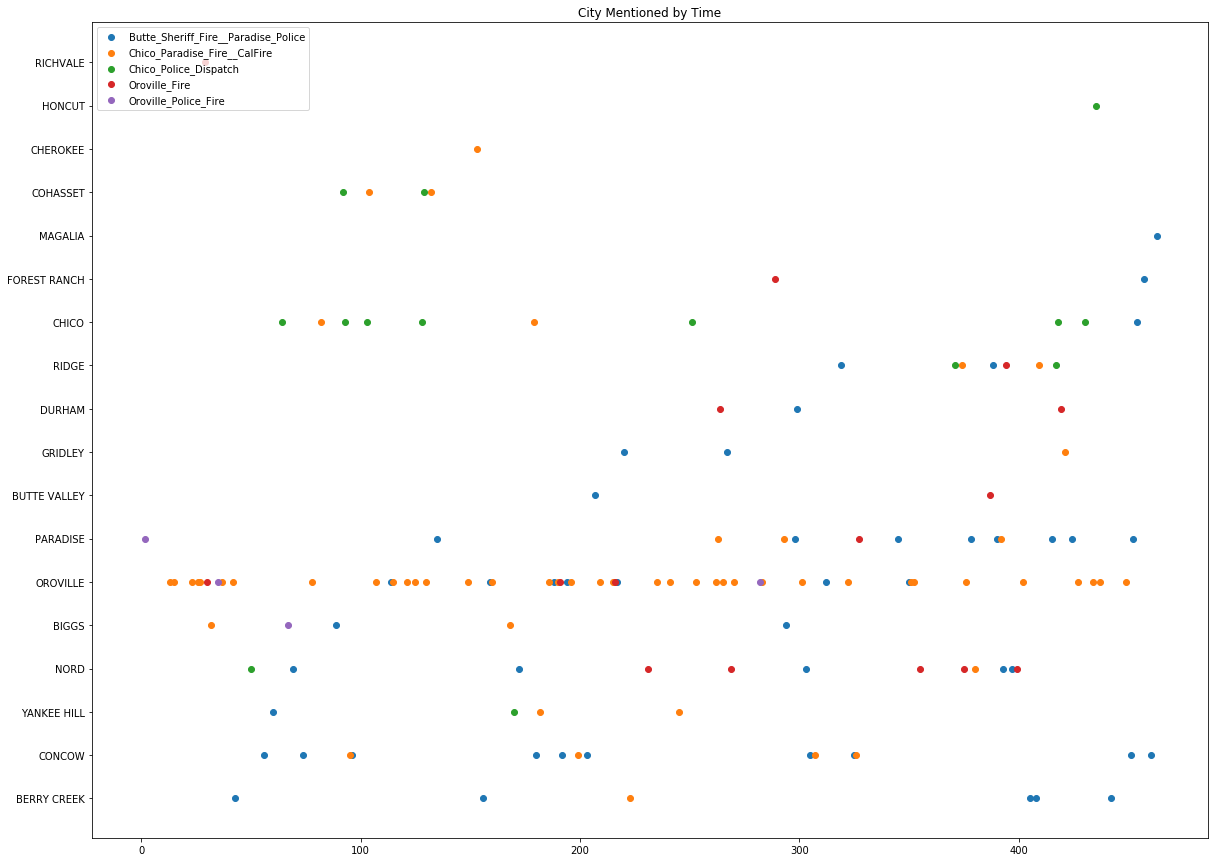

In [29]:
# Plot first location over time
# Reference: HISI in Stackoverflow (https://stackoverflow.com/questions/47006268/matplotlib-scatter-plot-with-color-label-and-legend-specified-by-c-option)
fig, ax = plt.subplots(figsize = (20,15))
scatter_x = df[df['num_locations'] != 0].index
scatter_y = df[df['num_locations'] != 0]['location_1'].values
group = np.array(df[df['num_locations'] != 0]['feed_name'].values)
for g in np.unique(group):
    i = np.where(group == g)
    ax.scatter(scatter_x[i], scatter_y[i], label=g)
ax.legend(loc = 2)
plt.title('City Mentioned by Time');

Observations:
- Can see as time goes on more cities become involved as the fire spreads
- Oroville is consistently mentioned
- NOTE: This is only the first city mentioned in an observation

### EDA: Text

In [30]:
# Get character count and word count
df['char_count'] = df['text_clean'].map(len)
df['word_count'] = df['text_clean'].map(lambda x: len(x.split()))

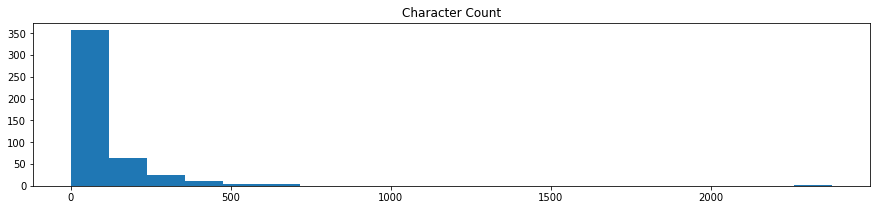

In [31]:
# Plot distribution of character count
plt.figure(figsize = (15, 3))
plt.hist(df['char_count'], bins = 20)
plt.title('Character Count');

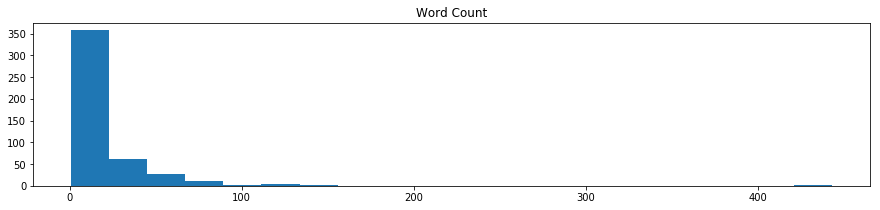

In [32]:
# Plot distribution of word count
plt.figure(figsize = (15, 3))
plt.hist(df['word_count'], bins = 20)
plt.title('Word Count');

Observation:
- Most observations have word count under 100 and character count under 500
    - Majority being even shorter
- There appears to be an outlier of word_count > 400 & char_count > 2000 

In [33]:
# Look at outlier: word_count > 400 & char_count > 2000
# Same observation
df[df['char_count'] > 2000][['text', 'char_count', 'word_count', 'speaker_length']]

,text,char_count,word_count,speaker_length
78,SOUNDSLIKE . Can't you see he's just a warning...,2379,443,2.5


In [34]:
# Associated text with outlier
df.iloc[78]['text']

"SOUNDSLIKE . Can't you see he's just a warning Like the evacuation . Currently , if they have a mandatory evacuations , tow pulled them out of this . That's it . For now . I have . It's all really about . I can't you could tell that will likely begin evacuation . Forty . Additionally , he has devised that power softly out of the mountain , and it is on propane . OROVILLE Water two hundred twenty seven responding copy . Paralyzed Water for twenty seven years in a state of shooters on Highway seventy , BIGGS arrived second . You're confident all the residents are out of school ? Guy just had a number of years and I want to get turned around and had invested in the way . Okay , that was twenty one sixty one year . Always made . Notifications pulled up and they were coming out twenty one seventy six down their fires . Just put it down and roll . Exactly . Wait . Get some on the other side . There's a bigger problem . Once we get the fourth River three forces coming down a man's barn like 

Observation: most likely an error in the translation where it was unable to pick up different speakers

In [35]:
# How many observations are just one word?
len(df[df['word_count'] == 1])

72

In [36]:
# Is there a certain word that is only said once?
df[df['word_count'] == 1]['text_clean'].value_counts().head(10)

i           5
you         3
yeah        3
evacuate    2
just        2
the         2
forty       2
oh          2
not         2
and         2
Name: text_clean, dtype: int64

Observation:
- Most common single words recorded: 'I', 'You', 'Yeah', 'Is' & 'The'
- Most likely that these should have been captured by the translator as a part of another observation (not it's own observation with just one word)
    - Possible that 'Yeah' is accurate as a one word response

In [37]:
# Lemmatize and stem the clean text
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [38]:
# Funciton to lemmatize a string
def lemmatize_text(raw_text):
    
    # Split and lemmatize
    lem = WordNetLemmatizer()
    text_lemmed = [lem.lemmatize(word) for word in raw_text.split()]

    # Join back together into a string and return
    return(" ".join(text_lemmed))

In [39]:
# Function to stem a string
def stem_text(raw_text):

    # Split and step
    ps = PorterStemmer()
    text_stemmed = [ps.stem(word) for word in raw_text.split()]

    # Join back together into a string and return
    return(" ".join(text_stemmed))

In [40]:
# Add new lemmed and stemmed text columns
df['text_lem'] = df['text_clean'].map(stem_text)
df['text_stem'] = df['text_clean'].map(stem_text)

In [41]:
# Count Vectorize
from sklearn.feature_extraction.text import CountVectorizer

In [42]:
# Compare number of features created by Count Vectorize in Lemming vs. Stemming
cvec = CountVectorizer(stop_words = 'english', min_df = 2, max_df = 1.0)

for method in ['lem', 'stem']:
    column_name = 'text_' + method
    # Fit Count Vectorier
    all_features = cvec.fit_transform(df[column_name])
    # Number of features created 
    print(f'Number of Features in Comment Text ({method}): {len(cvec.get_feature_names())}')

Number of Features in Comment Text (lem): 411
Number of Features in Comment Text (stem): 411


In [43]:
# They do the same thing it looks like so doesn't matter which one we choose
# ...will proceed with lemmatized version of text
# Fit Count Vectorier
all_features = cvec.fit_transform(df['text_lem'])

# Matrix of words to dataframe
df_lem = pd.DataFrame(all_features.toarray(), columns = cvec.get_feature_names())
print('Shape: ', df_lem.shape)
df_lem.head()

Shape:  (464, 411)


,abl,abov,accid,actual,addit,address,advis,affirm,ahead,aid,...,wind,won,work,wrote,yanke,yard,ye,yeah,year,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Append contains_evactuation, contains_fire
df_lem.insert(0, 'contains_fire', df['contains_fire'].values)
df_lem.insert(1, 'contains_evac', df['contains_evac'].values)

In [45]:
# Look at word frequency (words that appear the most across all observations)
# Reference: code adapted from NLP_EDA in DEN Flex by Sam Stack & Douglas Strodtman
# Create a dataframe with every word feature and the number of times that word appears in our title data
df_lem_count = {column : df_lem[column].sum() for column in df_lem.columns[2:]}
count = pd.DataFrame(df_lem_count, index = ['counts']).T

# View sorted
count.sort_values(by = 'counts', ascending = False).head(15)

,counts
twenti,138
wait,103
way,94
forti,88
seven,77
orovil,74
evacu,59
thirti,51
like,45
want,45


Observation: most commonly appearing words are 'Twenty', 'Wait', 'Way', 'Forty', 'Seven', 'Oroville', 'Evacuate' (and other forms), and 'Thirty'

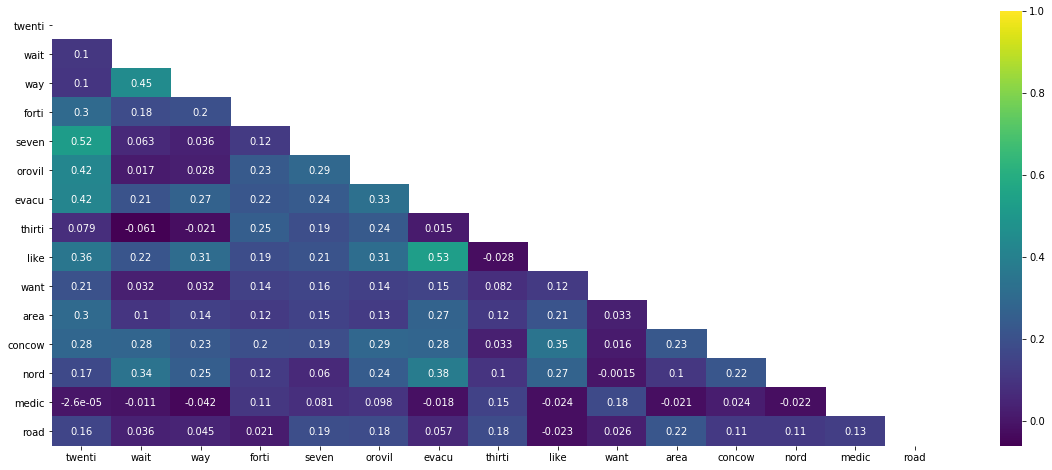

In [46]:
# Looking at the top 15 words and their correlation to one another
top15 = list(count.sort_values(by = 'counts', ascending = False).head(15).index)

plt.figure(figsize = (20,8))

corr = df_lem[top15].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,mask = mask, cmap='viridis', annot = True);

Observation/Correlated Words:
- 'evacu' (evacuated, evacuation, evacuating) correlated with 'like' (0.53)
- 'twenti' (twenty) and 'seven' are positively correlated (0.52)
- 'wait' and 'why' are positively correlated (0.45)

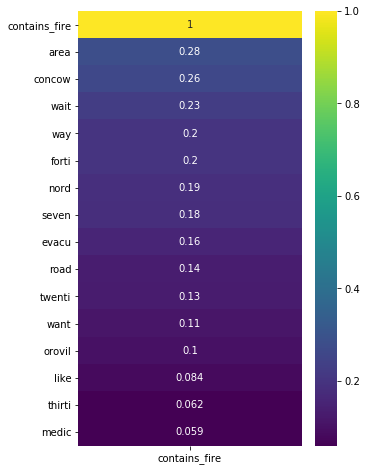

In [47]:
# Looking at the top 15 words that occur and their correlation to having fire in the obsevation
top15.append('contains_fire')
plt.figure(figsize=(5,8))
sns.heatmap(df_lem[top15].corr()[['contains_fire']].sort_values('contains_fire', ascending=False),
            annot=True, cmap='viridis');

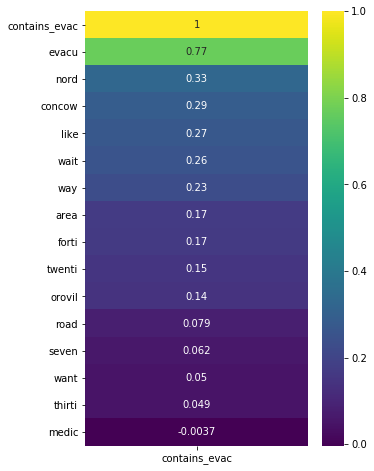

In [48]:
# Looking at the top 15 words that occur and their correlation to having 'evac' in the obsevation
top15 = list(count.sort_values(by = 'counts', ascending = False).head(15).index)
top15.append('contains_evac')

plt.figure(figsize=(5,8))
sns.heatmap(df_lem[top15].corr()[['contains_evac']].sort_values('contains_evac', ascending=False),
            annot=True, cmap='viridis');

Observation:
- 'nord' and 'concow' are both positively correlated with the mention of 'evac' in an observation
    - likely that these two towns were both evacuated (Concow was one of the worst hit areas)
- Interesting that 'wait' is relatively highly correlated. Were they waiting to issue an evacuation?

In [49]:
# Let's say our target is 'contains_fire' (1 = fire, 0 = no fire)
# What are the least correlated words with the target (aka no fire)?
top1000 = list(count.sort_values(by = 'counts', ascending = False).head(1000).index)
top1000.append('contains_fire')
df_lem[top1000].corr().sort_values(by = 'contains_fire')['contains_fire'].head(10)

clear      -0.060505
sixteen    -0.055735
local      -0.054594
check      -0.054594
durham     -0.049783
close      -0.049783
twelv      -0.047203
commun     -0.044479
hard       -0.044479
nineteen   -0.044479
Name: contains_fire, dtype: float64

In [50]:
# What are the least correlated words with the target (aka fire)?
top1000 = list(count.sort_values(by = 'counts', ascending = False).head(1000).index)
top1000.append('contains_fire')
df_lem[top1000].corr().sort_values(by = 'contains_fire', ascending=False)['contains_fire'].head(10)

contains_fire    1.000000
area             0.281968
report           0.270606
concow           0.263523
wait             0.226886
travel           0.218814
way              0.200716
forti            0.199633
coffe            0.195500
counti           0.195500
Name: contains_fire, dtype: float64

In [51]:
# Let's say our target is 'contains_evac' (1 = evac, 0 = no evac)
# What are the least correlated words with the target (aka no evac)?
top1000 = list(count.sort_values(by = 'counts', ascending = False).head(1000).index)
top1000.append('contains_evac')
df_lem[top1000].corr().sort_values(by = 'contains_evac')['contains_evac'].head(10)

littl      -0.045585
structur   -0.043198
hill       -0.043198
time       -0.041537
contact    -0.039004
yanke      -0.038014
someth     -0.038014
head       -0.038014
vehicl     -0.038014
unabl      -0.038014
Name: contains_evac, dtype: float64

In [52]:
# What are the least correlated words with the target (aka evac)?
top1000 = list(count.sort_values(by = 'counts', ascending = False).head(1000).index)
top1000.append('contains_evac')
df_lem[top1000].corr().sort_values(by = 'contains_evac', ascending=False)['contains_evac'].head(10)

contains_evac    1.000000
evacu            0.771807
mandatori        0.452316
nord             0.329197
concow           0.288003
gonna            0.282572
ve               0.276956
everyth          0.271685
like             0.269939
school           0.263428
Name: contains_evac, dtype: float64

### EDA: Time Series Plotting

In [53]:
# Time range to look at
start_time = df['start_time'][0] # get first start time
end_time = df['end_time'][len(df)-1] # get last end time

print(start_time)
print(end_time)

2018-11-08 06:44:31-08:00
2018-11-08 09:12:26-08:00


In [54]:
# Add 2 minutes to datetime object
start_time + datetime.timedelta(minutes=2)

Timestamp('2018-11-08 06:46:31-0800', tz='US/Pacific')

In [55]:
# Resample dataframe by 2 minute intervals
one_row = {}
all_rows = []
    
start_time = df['start_time'][0] # get first start time
start_time_plus2 = start_time + datetime.timedelta(minutes=2) # end of first two minute period
    
end_time = df['end_time'][len(df)-1] # get last end time
    
while (start_time < end_time):
        
    # Adding new row to dataframe
    one_row['start_time'] = start_time        
    one_row['end_time'] = start_time_plus2

    # Look in the X minute range for number of observations and add text to string
    text = ''
    for i, time in enumerate(df['start_time']):
        if (time >= start_time) & (time < start_time_plus2):
            text += ' ' + df['text'][i]
        elif time > start_time_plus2:
            break
    one_row['text'] = text
    
    all_rows.append(one_row)
        
    # Add time for next observation
    start_time += datetime.timedelta(minutes=2)
    start_time_plus2 += datetime.timedelta(minutes=2)
        
    # Reset dictionary for next observation
    one_row = {}

freq2 = pd.DataFrame(all_rows)

In [56]:
freq2.head()

,end_time,start_time,text
0,2018-11-08 06:46:31-08:00,2018-11-08 06:44:31-08:00,"sixty five area behind a wall . Or , you know..."
1,2018-11-08 06:48:31-08:00,2018-11-08 06:46:31-08:00,
2,2018-11-08 06:50:31-08:00,2018-11-08 06:48:31-08:00,
3,2018-11-08 06:52:31-08:00,2018-11-08 06:50:31-08:00,
4,2018-11-08 06:54:31-08:00,2018-11-08 06:52:31-08:00,


In [57]:
# Count of threat terms mentioned
def threat_mentioned(text):
    text_list = text.lower().split()
    threat_terms = ['fire', 'engine', 'evacuation', 'evacuating', 'evacuation', 
                    'mandatory', 'medic', 'emergency', 'danger', 'smoke']
    count = 0
    for term in threat_terms:
        count += text_list.count(term)
    return count

In [58]:
freq2['threat_count'] = freq2['text'].map(threat_mentioned)

In [59]:
freq2['threat_count'].value_counts()

0     25
3     12
1      9
2      8
7      4
4      4
6      3
5      3
10     2
9      2
13     1
12     1
Name: threat_count, dtype: int64

In [60]:
freq2['threat_count'].mean()

2.7162162162162162

In [61]:
# Get word count frequency (by second)
freq2['word_count'] = freq2['text'].map(len)
freq2['word_count_per_sec'] = freq2['word_count'] / (2 * 60)

In [62]:
freq2.head(3)

,end_time,start_time,text,threat_count,word_count,word_count_per_sec
0,2018-11-08 06:46:31-08:00,2018-11-08 06:44:31-08:00,"sixty five area behind a wall . Or , you know...",0,371,3.091667
1,2018-11-08 06:48:31-08:00,2018-11-08 06:46:31-08:00,,0,0,0.000000
2,2018-11-08 06:50:31-08:00,2018-11-08 06:48:31-08:00,,0,0,0.000000


In [63]:
# Save frequency dataframe
freq2.to_csv('../data/frequency2min.csv', index=False)

In [64]:
# Add times where evacuations were ordered
# Time from: https://abc7news.com/timeline-of-terror-the-evacuation-of-paradise-from-beginning-to-end/4850913
# 7:23 a.m. - Butte County Sheriff tweets evacuation order for the town of Pulga. 
time1 = freq2['end_time'][0] + datetime.timedelta(minutes=37)
# Butte County Sheriff tweets evacuation order for the town of Pulga. 
time2 = freq2['end_time'][0] + datetime.timedelta(minutes=77) 
# 8:03 a.m. - Butte County Sheriff tweets first evacuation order for Paradise.

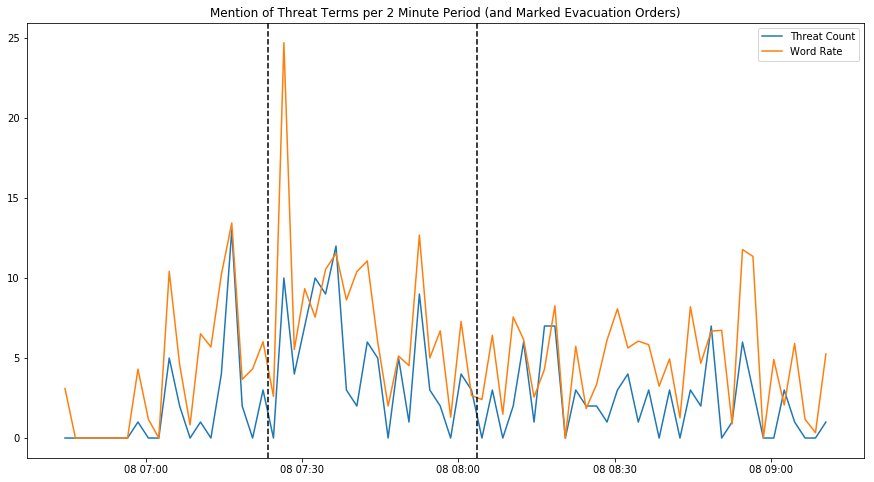

In [92]:
# Plot mention of threat terms and word frequency over time
plt.figure(figsize = (15, 8))
plt.plot(freq2['start_time'], freq2['threat_count'], label = 'Threat Count')
plt.plot(freq2['start_time'], freq2['word_count_per_sec'], label = 'Word Rate')
plt.title('Mention of Threat Terms per 2 Minute Period (and Marked Evacuation Orders)')
plt.legend()
xposition = [time1, time2]
for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='--')

Observation: 
- Word rate went up a lot after the first evacuation announcement
- Word rate and count of threat terms mentioned seem to be correlated
- Threat terms mentioned a lot between 7:25 and 8:00

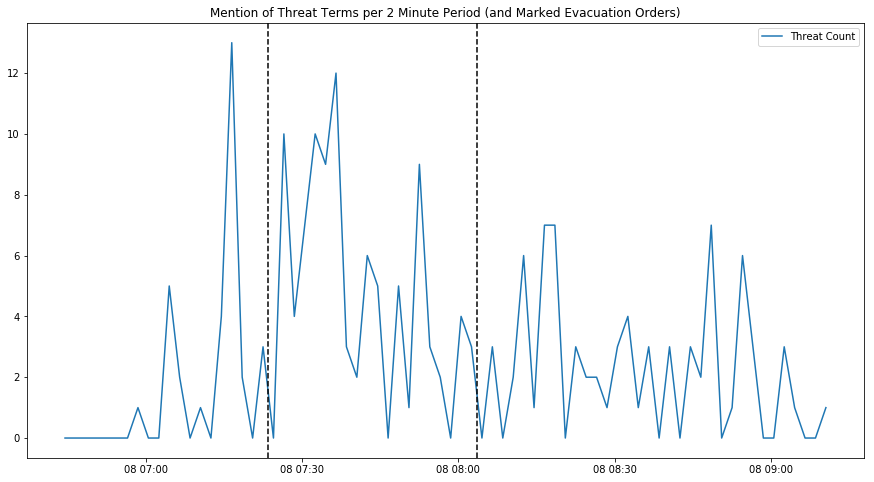

In [106]:
# Plot just threat terms
plt.figure(figsize = (15, 8))
plt.plot(freq2['start_time'], freq2['threat_count'], label = 'Threat Count')
plt.title('Mention of Threat Terms per 2 Minute Period (and Marked Evacuation Orders)')
plt.legend()
xposition = [time1, time2]
for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='--')
plt.savefig('../images/threat_count.png') # save figure

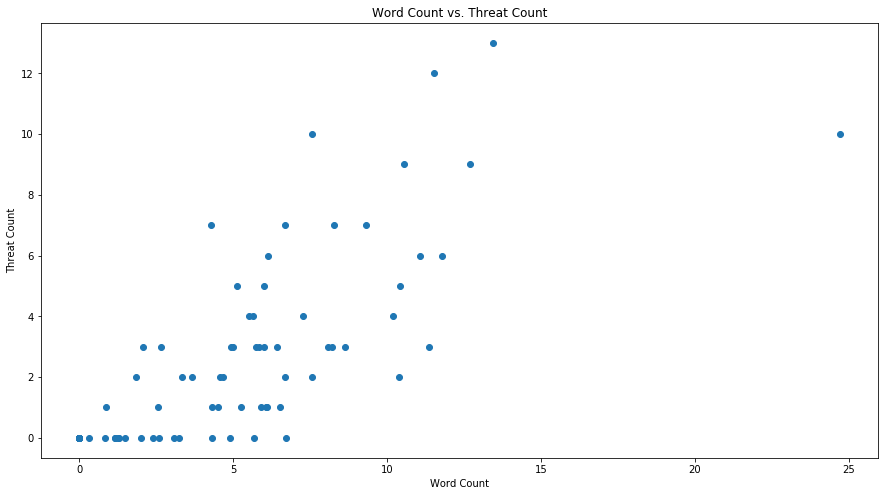

In [69]:
# Plot scatter plot of word count rate vs threat count
plt.figure(figsize = (15, 8))
plt.scatter(freq2['word_count_per_sec'], freq2['threat_count'])
plt.xlabel('Word Count')
plt.ylabel('Threat Count')
plt.title('Word Count vs. Threat Count');

In [70]:
# What is the correlation?
freq2.corr()['word_count']['threat_count']

0.752930694045835

Observation:
- Pretty high correlation (0.55)
- One outlier (word count > 24)

In [71]:
# Look at outlier
freq2[freq2['word_count_per_sec'] > 20]['text'].values

array([" I want you want Teo . Wait !  Twenty five . I think the subject on help . Boulevard near Hell . Go Avenue B m a black hat Black study crowd down in a ditch When the r p past  It's so number . Yeah . Three , five four three three , three zero .  SOUNDSLIKE . Can't you see he's just a warning Like the evacuation . Currently , if they have a mandatory evacuations , tow pulled them out of this . That's it . For now . I have . It's all really about . I can't you could tell that will likely begin evacuation . Forty . Additionally , he has devised that power softly out of the mountain , and it is on propane . OROVILLE Water two hundred twenty seven responding copy . Paralyzed Water for twenty seven years in a state of shooters on Highway seventy , BIGGS arrived second . You're confident all the residents are out of school ? Guy just had a number of years and I want to get turned around and had invested in the way . Okay , that was twenty one sixty one year . Always made . Notificatio

Observation: most likely not all spoken in 2 minutes

In [72]:
# Looks like threats were mentioned a lot between 7:25 and 7:37
start_time = df['start_time'][0]
time725 = start_time + datetime.timedelta(minutes=41)
time737 = start_time + datetime.timedelta(minutes=53)

freq2[(freq2['start_time'] > time725) & (freq2['start_time'] < time737)]

,end_time,start_time,text,threat_count,word_count,word_count_per_sec
21,2018-11-08 07:28:31-08:00,2018-11-08 07:26:31-08:00,I want you want Teo . Wait ! Twenty five . I...,10,2965,24.708333
22,2018-11-08 07:30:31-08:00,2018-11-08 07:28:31-08:00,it's five . A report of an illegal burn . Unk...,4,663,5.525000
23,2018-11-08 07:32:31-08:00,2018-11-08 07:30:31-08:00,"CONCOW . EVACUATE , BIGGS . Thanks FIRE year...",7,1120,9.333333
24,2018-11-08 07:34:31-08:00,2018-11-08 07:32:31-08:00,that It is . FIRE division was not respondi...,10,906,7.550000
25,2018-11-08 07:36:31-08:00,2018-11-08 07:34:31-08:00,"on . One , three , three , nine , zero , thre...",9,1265,10.541667
26,2018-11-08 07:38:31-08:00,2018-11-08 07:36:31-08:00,forming a hardware on highway PHRASE . Today ...,12,1384,11.533333


In [73]:
ten_mi = freq2[(freq2['start_time'] > time725) & (freq2['start_time'] < time737)]['text']

In [74]:
# Find the common words spoken in this ten minute time period
cvec = CountVectorizer(stop_words = 'english', min_df = 2, max_df = 1.0)
all_features = cvec.fit_transform(freq2[(freq2['start_time'] > time725) & (freq2['start_time'] < time737)]['text'])

# Matrix of words to dataframe
df_cvec = pd.DataFrame(all_features.toarray(), columns = cvec.get_feature_names())

# Create a dataframe with every word feature and the number of times that word appears in our title data
df_cvec_counts = {column : df_cvec[column].sum() for column in df_cvec.columns[2:]}
counts = pd.DataFrame(df_cvec_counts, index = ['counts']).T

# View sorted (top 15 words)
counts.sort_values(by = 'counts', ascending = False).head(17)

,counts
oroville,15
concow,13
seven,13
engine,12
zero,10
area,10
years,9
like,9
highway,9
just,8


In [75]:
# Resample by five minute periods
one_row = {}
all_rows = []
start_time = df['start_time'][0] # get first start time
start_time_plus2 = start_time + datetime.timedelta(minutes=5) # end of first two minute period
end_time = df['end_time'][len(df)-1] # get last end time
while (start_time < end_time):
    # Adding new row to dataframe
    one_row['start_time'] = start_time
    one_row['end_time'] = start_time_plus2
    
    # Look in the two minute range for number of observations with the word fire
    text = ''
    for i, time in enumerate(df['start_time']):

        if (time >= start_time) & (time < start_time_plus2):
            text += ' ' + df['text'][i]
        elif time > start_time_plus2:
            break
        
    one_row['text'] = text
    all_rows.append(one_row)
    
    start_time += datetime.timedelta(minutes=5)
    start_time_plus2 += datetime.timedelta(minutes=5)
    
    one_row = {}

freq5 = pd.DataFrame(all_rows)

freq5['threat_count'] = freq5['text'].map(threat_mentioned)
freq5['word_count'] = freq5['text'].map(len)
freq5['word_count_per_sec'] = freq5['word_count'] / (5 * 60)

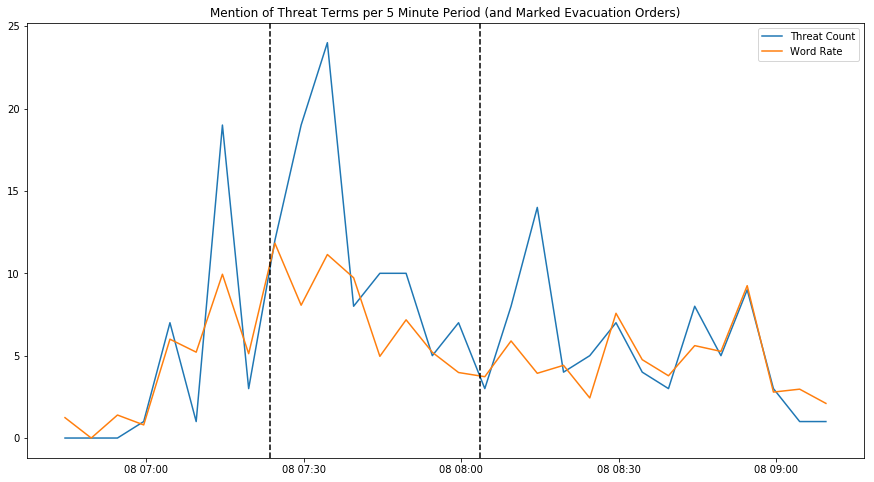

In [76]:
# Plot mention of threat terms and word frequency over time
plt.figure(figsize = (15, 8))
plt.plot(freq5['start_time'], freq5['threat_count'], label = 'Threat Count')
plt.plot(freq5['start_time'], freq5['word_count_per_sec'], label = 'Word Rate')
plt.title('Mention of Threat Terms per 5 Minute Period (and Marked Evacuation Orders)')
plt.legend()
xposition = [time1, time2]
for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='--')

In [77]:
# What is the correlation?
freq5.corr()['word_count']['threat_count']

0.7761540555750662

In [78]:
# Resample by one minute periods
one_row = {}
all_rows = []
start_time = df['start_time'][0] # get first start time
start_time_plus2 = start_time + datetime.timedelta(minutes=1) # end of first two minute period
end_time = df['end_time'][len(df)-1] # get last end time
while (start_time < end_time):
    # Adding new row to dataframe
    one_row['start_time'] = start_time
    one_row['end_time'] = start_time_plus2
    
    # Look in the two minute range for number of observations with the word fire
    text = ''
    for i, time in enumerate(df['start_time']):

        if (time >= start_time) & (time < start_time_plus2):
            text += ' ' + df['text'][i]
        elif time > start_time_plus2:
            break
        
    one_row['text'] = text
    all_rows.append(one_row)
    
    start_time += datetime.timedelta(minutes=1)
    start_time_plus2 += datetime.timedelta(minutes=1)
    
    one_row = {}

freq1 = pd.DataFrame(all_rows)

freq1['threat_count'] = freq1['text'].map(threat_mentioned)
freq1['word_count'] = freq1['text'].map(len)
freq1['word_count_per_sec'] = freq1['word_count'] / (1 * 60)

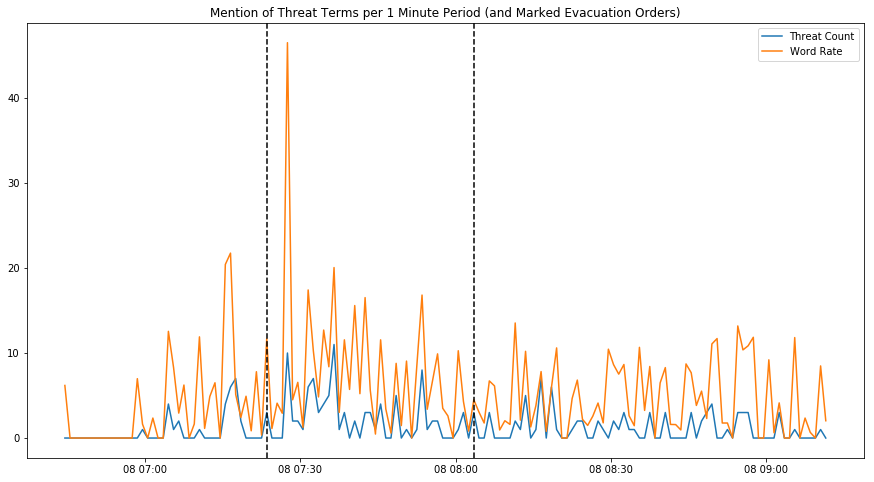

In [79]:
# Plot mention of threat terms and word frequency over time
plt.figure(figsize = (15, 8))
plt.plot(freq1['start_time'], freq1['threat_count'], label = 'Threat Count')
plt.plot(freq1['start_time'], freq1['word_count_per_sec'], label = 'Word Rate')
plt.title('Mention of Threat Terms per 1 Minute Period (and Marked Evacuation Orders)')
plt.legend()
xposition = [time1, time2]
for xc in xposition:
    plt.axvline(x=xc, color='k', linestyle='--')

In [80]:
freq1.corr()['threat_count']['word_count']

0.7075622920815821

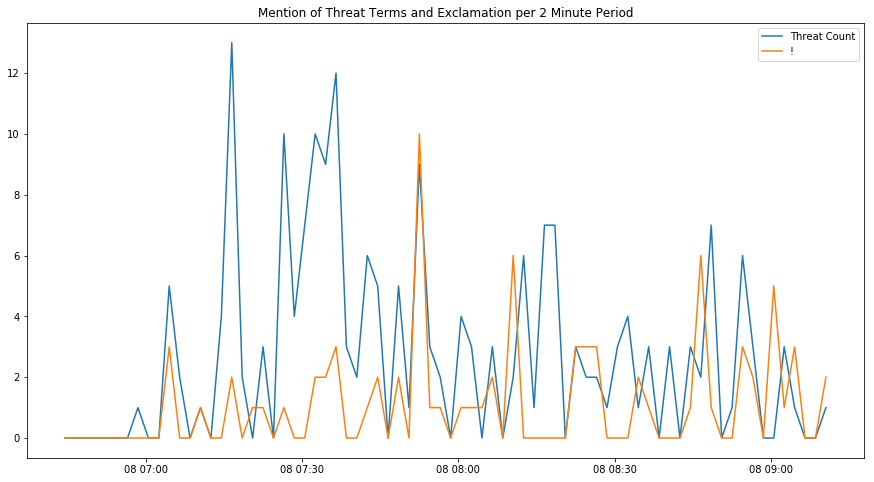

In [81]:
# Are exlamation marks and threat terms correlated?
freq2['exclamation'] = freq2['text'].map(lambda x: x.split().count('!'))

# Plot mention of fire, evacuation and word frequency over time
plt.figure(figsize = (15, 8))
plt.plot(freq2['start_time'], freq2['threat_count'], label = 'Threat Count')
plt.plot(freq2['start_time'], freq2['exclamation'], label = '!')
plt.title('Mention of Threat Terms and Exclamation per 2 Minute Period')
plt.legend();

In [82]:
freq2.corr()['threat_count']['exclamation']

0.3430131183490208

Observation: somewhat correlated

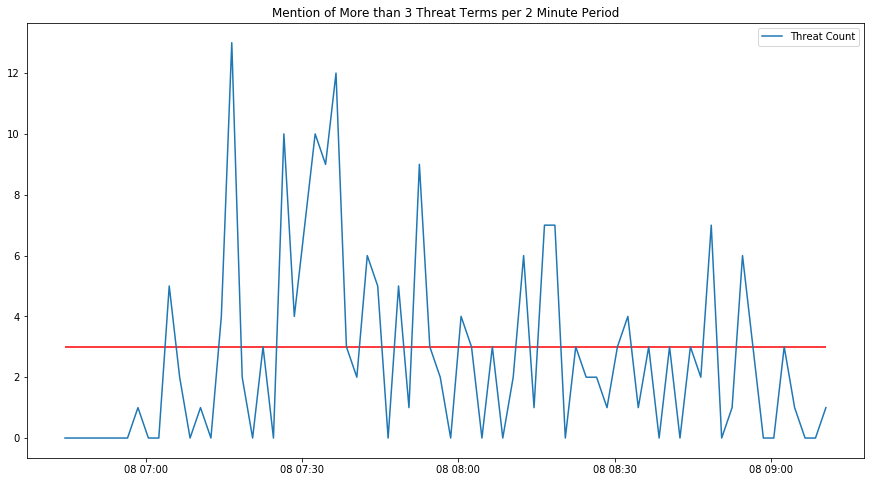

In [83]:
# How could we use this to signal severity?
# Say more than 3 threat terms are mentioned?
plt.figure(figsize = (15, 8))
plt.plot(freq2['start_time'], freq2['threat_count'], label = 'Threat Count')
plt.title('Mention of More than 3 Threat Terms per 2 Minute Period')
plt.legend()
plt.hlines(y=3, xmin = freq2['start_time'][0], xmax = freq2['start_time'][len(freq2) - 1], colors = 'red');

In [84]:
# Look at locations mentioned vs
# Returns list of locations from our pre-defined list present in a single observation
def get_location(text):
    
    # Pre-defined location list
    location_list = ['CHICO', 'PARADISE', 'OROVILLE', 'MAGALIA', 'THERMALITO', 'GRIDLEY', 'DURHAM', 'PALERMO', 'RIDGE', 'BIGGS', 
                        'COHASSET', 'BERRY-CREEK', 'FOREST-RANCH', 'BUTTE-CREEK-CANYON', 'BUTTE-VALLEY', 'COHASSET', 'CONCOW', 'BANGOR', 
                        'HONCUT', 'YANKEE-HILL', 'FORBESTOWN', 'NORD', 'PUGLIA', 'STIRLING-CITY', 'RICHVALE', 'RACKERBY', 'BERRY-CREEK-RANCHERIA', 
                        'CLIPPER-MILLS', 'ROBINSON-MILL', 'CHEROKEE', 'BUTTE-MEADOWS', 'ENTERPRISE-RANCHERIA']
    
    # Get list of locatoins mentioned
    locations_mentioned = []
    for location in location_list:
        if location.lower() in text.lower():
            locations_mentioned.append(location.replace('-',' '))
    
    return locations_mentioned

In [88]:
freq2['locations'] = freq2['text'].map(get_location)

In [89]:
freq2['num_locations'] = freq2['locations'].map(len)

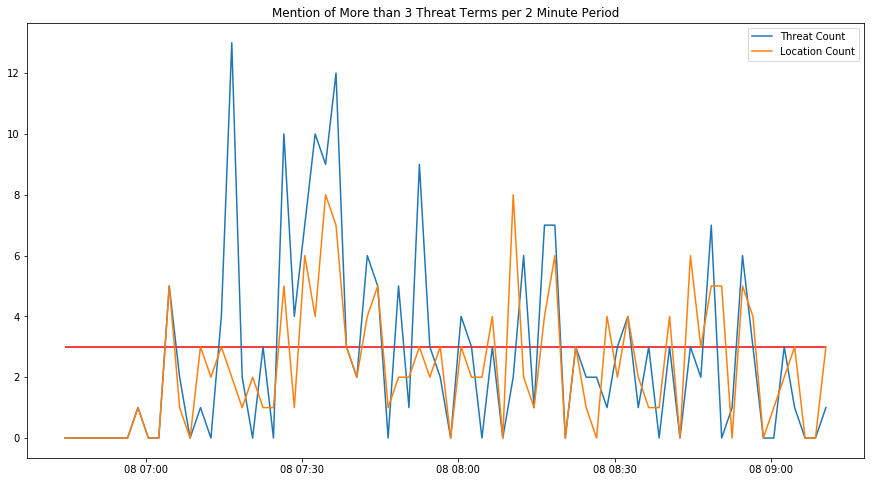

In [90]:
# How could we use this to signal severity?
# Say more than 3 threat terms are mentioned?
plt.figure(figsize = (15, 8))
plt.plot(freq2['start_time'], freq2['threat_count'], label = 'Threat Count')
plt.plot(freq2['start_time'], freq2['num_locations'], label = 'Location Count')
plt.title('Mention of More than 3 Threat Terms per 2 Minute Period')
plt.legend()
plt.hlines(y=3, xmin = freq2['start_time'][0], xmax = freq2['start_time'][len(freq2) - 1], colors = 'red');